In [257]:
import pandas as pd
import string
import nltk

In [258]:
category_list = []
message_list = []

with open('./data/SMSSpamCollection') as f:
    for line in f:
        row = line.split('\t', maxsplit=1)
        category_list.append(row[0])
        message_list.append(row[1])

dict = {'Category': category_list, 'Message': message_list}
df = pd.DataFrame(data=dict)
df['Category'] = df['Category'].replace(['ham', 'spam'], [0, 1])
df

/var/folders/4s/pf1zdv_x4_qcflpq4m943q0m0000gn/T/ipykernel_91514/4088057831.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace(['ham', 'spam'], [0, 1])


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...\n
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?\n
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


In [259]:
df['Category'].value_counts()

Category
0    4827
1     747
Name: count, dtype: int64

In [260]:
df['Category'].value_counts(normalize=True)

Category
0    0.865985
1    0.134015
Name: proportion, dtype: float64

In [261]:
new_spam_df = pd.read_csv('./data/spam-text-messages.txt')
new_spam_df = new_spam_df.drop(columns=['message_id']).rename(columns={"message_text": "Message", "spam_label" : "Category"})
df = pd.concat([new_spam_df, df])
df['Category'].value_counts()

Category
0    4827
1     947
Name: count, dtype: int64

## Text Preprossessing

In [262]:
df_cleaning = df.copy()

In [263]:
df_cleaning['lower_message'] = df_cleaning['Message'].str.lower()
df_cleaning

,Message,Category,lower_message
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in..."
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s..."
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...


In [264]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df_cleaning['message_wo_punct'] = df_cleaning["lower_message"].apply(lambda text: remove_punctuation(text))
df_cleaning

,Message,Category,lower_message,message_wo_punct
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in...",urgent your mobile number has won 500000 in ou...
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...,congratulations youve been selected for a free...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...,your package delivery 8742 is pending update d...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...,netflix your account has been suspended update...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...,50 off at fashion world limited time offer sho...
...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...


In [265]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_cleaning['message_no_stopwords'] = df_cleaning['message_wo_punct'].apply(lambda text: remove_stopwords(text))
df_cleaning

,Message,Category,lower_message,message_wo_punct,message_no_stopwords
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in...",urgent your mobile number has won 500000 in ou...,urgent mobile number 500000 prize draw call cl...
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...,congratulations youve been selected for a free...,congratulations youve selected free iphone 14 ...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...,your package delivery 8742 is pending update d...,package delivery 8742 pending update delivery ...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...,netflix your account has been suspended update...,netflix account suspended update payment info ...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...,50 off at fashion world limited time offer sho...,50 fashion world limited time offer shop fwsal...
...,...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...


In [266]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split(), lang='eng')
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_cleaning['message_lemmatized'] = df_cleaning['message_no_stopwords'].apply(lambda text: lemmatize_words(text))
df_cleaning

,Message,Category,lower_message,message_wo_punct,message_no_stopwords,message_lemmatized
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in...",urgent your mobile number has won 500000 in ou...,urgent mobile number 500000 prize draw call cl...,urgent mobile number 500000 prize draw call cl...
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...,congratulations youve been selected for a free...,congratulations youve selected free iphone 14 ...,congratulation youve select free iphone 14 cli...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...,your package delivery 8742 is pending update d...,package delivery 8742 pending update delivery ...,package delivery 8742 pending update delivery ...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...,netflix your account has been suspended update...,netflix account suspended update payment info ...,netflix account suspend update payment info ne...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...,50 off at fashion world limited time offer sho...,50 fashion world limited time offer shop fwsal...,50 fashion world limit time offer shop fwsales...
...,...,...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...,2nd time try 2 contact u u £750 pound prize 2 ...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home,ü b go esplanade fr home
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestion
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,guy bitch act like id interested buying someth...


In [267]:
df_cleaning['Category'] = df_cleaning['Category'].replace(['ham', 'spam'], [0, 1])
df_cleaning

,Message,Category,lower_message,message_wo_punct,message_no_stopwords,message_lemmatized
0,"URGENT: Your mobile number has won $500,000 in...",1,"urgent: your mobile number has won $500,000 in...",urgent your mobile number has won 500000 in ou...,urgent mobile number 500000 prize draw call cl...,urgent mobile number 500000 prize draw call cl...
1,CONGRATULATIONS! You've been selected for a fr...,1,congratulations! you've been selected for a fr...,congratulations youve been selected for a free...,congratulations youve selected free iphone 14 ...,congratulation youve select free iphone 14 cli...
2,Your package delivery #8742 is pending. Update...,1,your package delivery #8742 is pending. update...,your package delivery 8742 is pending update d...,package delivery 8742 pending update delivery ...,package delivery 8742 pending update delivery ...
3,NETFLIX: Your account has been suspended. Upda...,1,netflix: your account has been suspended. upda...,netflix your account has been suspended update...,netflix account suspended update payment info ...,netflix account suspend update payment info ne...
4,50% OFF at Fashion World! Limited time offer. ...,1,50% off at fashion world! limited time offer. ...,50 off at fashion world limited time offer sho...,50 fashion world limited time offer shop fwsal...,50 fashion world limit time offer shop fwsales...
...,...,...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...,2nd time try 2 contact u u £750 pound prize 2 ...
5570,Will ü b going to esplanade fr home?\n,0,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home,ü b go esplanade fr home
5571,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestion
5572,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,guy bitch act like id interested buying someth...


In [268]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_cleaning['message_lemmatized'], df_cleaning['Category'], test_size=.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape (number of strings, number of unique words):")
print(X_train_tfidf.shape)
print('List of unique words:')
print(tfidf_vectorizer.get_feature_names_out())
print("Vector Matrix for training data:")
print(X_train_tfidf.toarray())

Shape (number of strings, number of unique words):
(4619, 7751)
List of unique words:
['008704050406' '0089my' '0121' ... 'zoe' 'zogtorius' 'üll']
Vector Matrix for training data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [269]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

y_pred_lr = lr_classifier.predict(X_test_tfidf)

class_report_lr = classification_report(y_test, y_pred_lr)
print("Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(class_report_lr)

y_train_pred = lr_classifier.predict(X_train_tfidf)
class_report_train = classification_report(y_train, y_train_pred)
print("Train Data:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(class_report_train)

Test Data:
Accuracy: 0.9567099567099567
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       969
           1       0.98      0.75      0.85       186

    accuracy                           0.96      1155
   macro avg       0.97      0.87      0.91      1155
weighted avg       0.96      0.96      0.95      1155

Train Data:
Accuracy: 0.957350075773977
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3858
           1       0.99      0.75      0.85       761

    accuracy                           0.96      4619
   macro avg       0.97      0.87      0.91      4619
weighted avg       0.96      0.96      0.95      4619



In [270]:
from sklearn.metrics import roc_curve, auc

y_score = lr_classifier.fit(X_train_tfidf, y_train).decision_function(X_test_tfidf)
print(y_score)

[-2.35491832 -2.58679355 -1.94767577 ...  0.714711   -1.90918222
 -3.89233888]


Test Data:


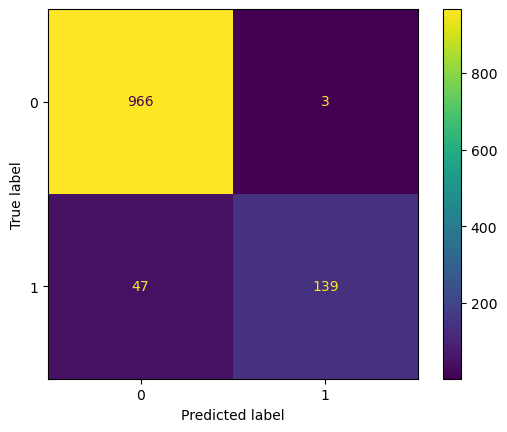

In [271]:
print("Test Data:")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Train Data:


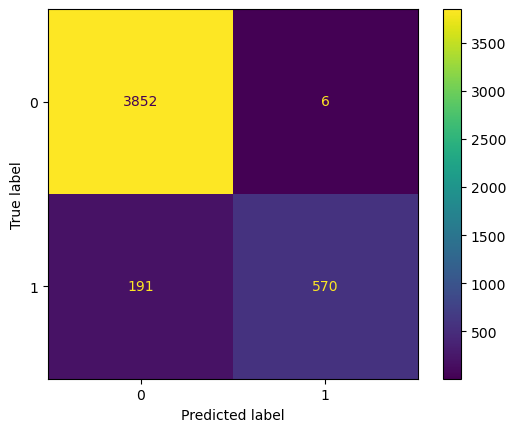

In [272]:
print("Train Data:")
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [273]:
""" from imblearn.over_sampling import RandomOverSampler

X = df_cleaning[['message_lemmatized']]
y = df_cleaning['Category']

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['label'] = y_resampled

df_balanced['label'].value_counts()
df_balanced.head """

" from imblearn.over_sampling import RandomOverSampler\n\nX = df_cleaning[['message_lemmatized']]\ny = df_cleaning['Category']\n\noversampler = RandomOverSampler(random_state=42)\n\nX_resampled, y_resampled = oversampler.fit_resample(X, y)\n\ndf_balanced = pd.DataFrame(X_resampled, columns=X.columns)\ndf_balanced['label'] = y_resampled\n\ndf_balanced['label'].value_counts()\ndf_balanced.head "

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(df_cleaning['message_lemmatized'], df_cleaning['Category'], test_size=.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape (number of strings, number of unique words):")
print(X_train_tfidf.shape)
print('List of unique words:')
print(tfidf_vectorizer.get_feature_names_out())
print("Vector Matrix for training data:")
print(X_train_tfidf.toarray())

Shape (number of strings, number of unique words):
(4619, 7751)
List of unique words:
['008704050406' '0089my' '0121' ... 'zoe' 'zogtorius' 'üll']
Vector Matrix for training data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [275]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_oversamp, y_oversamp = sm.fit_resample(X_train_tfidf, y_train)
print(y_oversamp.value_counts())

Category
0    3858
1    3858
Name: count, dtype: int64


In [276]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_oversamp, y_oversamp)

y_pred_lr = lr_classifier.predict(X_test_tfidf)

class_report_lr = classification_report(y_test, y_pred_lr)
print("Test Data:")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(class_report_lr)

y_train_pred = lr_classifier.predict(X_train_tfidf)
class_report_train = classification_report(y_train, y_train_pred)
print("Train Data:")
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print(class_report_train)

Test Data:
Accuracy:  0.9783549783549783
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       969
           1       0.95      0.91      0.93       186

    accuracy                           0.98      1155
   macro avg       0.97      0.95      0.96      1155
weighted avg       0.98      0.98      0.98      1155

Train Data:
Accuracy:  0.9880926607490799
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3858
           1       0.95      0.98      0.96       761

    accuracy                           0.99      4619
   macro avg       0.97      0.98      0.98      4619
weighted avg       0.99      0.99      0.99      4619



Test Data:


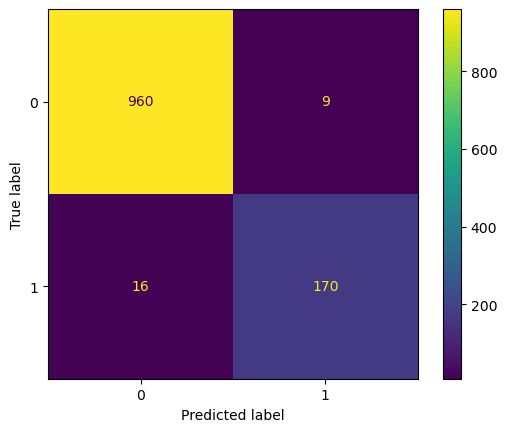

In [277]:
print("Test Data:")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Train Data:


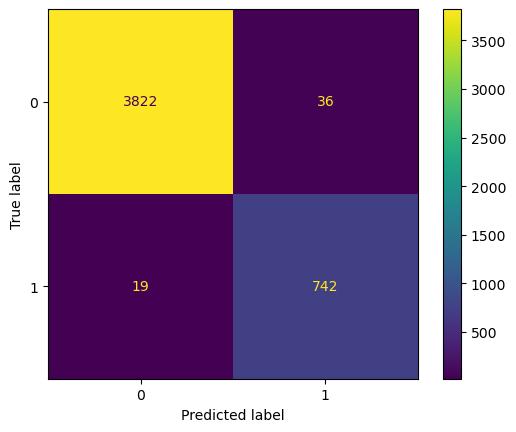

In [278]:
print("Train Data:")
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()